##      Aircraft Wildlife Strike Analysis: Enhancing Aviation Safety





<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://radpetroai.com/wp-content/uploads/2021/08/Airport-landing-page.jpg"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

## Table of Contents

* [1. Project Overview](#chapter1)
  * [1.1 Introduction](#section_1_1)
      * [1.1.1 Problem Statement](#sub_section_1_1_1)
      * [1.1.2 Objectives](#sub_section_1_1_2)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA)](#chapter5)
* [6. Model training](#chapter7)
* [7. Model Performance Comparison and evaluation](#chapter8)
* [8. Fine-tune model parameters and hyperparameters](#chapter9)

# <font color=black>1. Project Overview</font> <a class="anchor" id="chapter1"></a>

## 1.1. Introduction

Wildlife strikes pose a significant threat to aviation safety, impacting both aircraft operations and wildlife conservation. This project focuses on analyzing wildlife strike data to uncover patterns, identify high-risk species, and assess the severity of incidents. By leveraging data-driven insights, the study aims to support the development of effective mitigation strategies, ensuring safer skies for aviation and preserving ecological balance.

## 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

Wildlife strikes are a persistent challenge for the aviation industry, causing safety risks, economic burdens, and environmental concerns. Despite existing mitigation measures, the frequency of wildlife strikes remains high, often due to insufficient understanding of contributing factors such as species behavior, airport environments, and seasonal variations. This project addresses the lack of comprehensive data analysis that could help stakeholders implement targeted and effective strategies to reduce wildlife strikes.

## 1.1.2 Objectives <a class="anchor" id="sub_section_1_1_2"></a>



1.   **Analyze Historical Wildlife Strike Data:**

      Identify trends, seasonal patterns, and geographical hotspots using historical records.

2.   **Determine Contributing Factors:**

      Investigate environmental, operational, and species-specific factors influencing strike frequency and severity.

3.   **Develop Predictive Models:**

      Create predictive models to forecast strike probabilities based on key variables like time of day, weather, and species activity.

4.   **Propose Mitigation Strategies:**

      Provide actionable recommendations for airport wildlife management teams, including habitat modifications, enhanced monitoring, and technology-driven interventions.


5.  **Enhance Awareness Through Visualizations:**

      Develop interactive dashboards and reports to communicate insights effectively to stakeholders, including airport authorities, pilots, and policy-makers.






# <font color=black>2. Importing Packages</font> <a class="anchor" id="chapter2"></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
#from chart_studio.plotly import plot, iplot
from plotly.offline import iplot
import warnings

# Temporarily suppress all warnings
warnings.filterwarnings("ignore")

# <font color=black> 3. Loading Data</font> <a class="anchor" id="chapter3"></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving database.csv to database.csv


In [6]:
df = pd.read_csv("database.csv")
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


## Dataset Overview

The uploaded dataset contains 174,104 entries and 66 columns, providing detailed information on wildlife strike incidents in aviation. Below is a summary of its structure and content:

Key Features:

- **Incident Details:**

    Incident Year, Incident Month, Incident Day: Dates of incidents.
    Operator, Operator ID: Airline or entity operating the aircraft.
    Airport, State, FAA Region: Location details.

- **Aircraft Information:**

    Aircraft, Aircraft Type, Aircraft Make, Aircraft Model: Aircraft specifications.
    Engine Make, Engine Model, Engine Type: Engine details.
    Engines, Engine Positions: Number and positions of engines.

- **Environmental Factors:**

    Visibility, Precipitation: Weather conditions during the incident.
    Height, Speed, Distance: Environmental metrics related to the strike.

- **Wildlife Information:**

    Species ID, Species Name, Species Quantity: Wildlife involved in the strikes.

- **Impact and Damage:**

    Flight Impact: Impact on the flight (e.g., delays or diversions).
    Aircraft Damage: Level of damage caused by the strike.
    Various strike and damage metrics: For radome, engines, wings, fuselage, tail, landing gear, lights, and others.

- **Safety Outcomes:**

    Fatalities, Injuries: Human consequences of the incidents.

**Data Types:**

1. Numeric (float/int): Used for quantities like Height, Speed, Fatalities, and Injuries.

2. Categorical (object): Includes columns like Operator, Species Name, and Aircraft Model.

# <font color=black> 4. Data cleaning</font> <a class="anchor" id="chapter4"></a>

Data cleaning is the process of fixing bad data in our dataset. This step is crucial in the data analysis process, it helps ensure that the data is accurate, consistent, and reliable. Clean data leads to more accurate analysis and modeling results, thus provides a solid foundation for decision-making. The dataset might contain missing values in key columns, particularly related to aircrafts and previous incident details,
which will be addressed during data cleaning.

In [7]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop rows where all values are missing
df_cleaned = df.dropna(how='all')

In [8]:
print(df_cleaned.shape)

(174104, 66)


In [9]:
# Assuming df_cleaned is the DataFrame after cleaning
print(df_cleaned.head())     # Display the first few rows of the cleaned data
print(df_cleaned.describe()) # Get summary statistics for the cleaned data
print(df_cleaned.info())     # Get information about the cleaned dataset

   Record ID  Incident Year  Incident Month  Incident Day Operator ID  \
0     127128           1990               1             1         DAL   
1     129779           1990               1             1         HAL   
2     129780           1990               1             2         UNK   
3       2258           1990               1             3         MIL   
4       2257           1990               1             3         MIL   

          Operator   Aircraft Aircraft Type Aircraft Make Aircraft Model  ...  \
0  DELTA AIR LINES  B-757-200             A           148             26  ...   
1     HAWAIIAN AIR       DC-9             A           583             90  ...   
2          UNKNOWN    UNKNOWN           NaN           NaN            NaN  ...   
3         MILITARY      A-10A             A           345            NaN  ...   
4         MILITARY       F-16             A           561            NaN  ...   

   Fuselage Strike  Fuselage Damage Landing Gear Strike  Landing Gear Dama

In [10]:
print(df_cleaned.isnull().sum())

Record ID         0
Incident Year     0
Incident Month    0
Incident Day      0
Operator ID       0
                 ..
Tail Damage       0
Lights Strike     0
Lights Damage     0
Other Strike      0
Other Damage      0
Length: 66, dtype: int64


## Insights:

Some columns, such as Aircraft Model, Engine Model, and Visibility, have missing or inconsistent data.
Columns like Fatalities and Injuries are sparsely populated, indicating rare but significant events.

#Duplicates



In [11]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## Insights:

The dataset contains no duplicate rows, which suggests that each entry represents a unique wildlife strike incident.


- **Data Integrity:**
The absence of duplicates indicates the data collection process is robust, with no redundancy in recording incidents. This ensures that analyses based on this data will not be biased by overrepresentation of certain events.

- **Coverage:**
Each record being unique implies the dataset might comprehensively capture distinct incidents, providing a reliable foundation for exploring patterns and trends.

# <font color=black>5. Exploratory Data Analysis</font> <a>

---


Exploratory Data Analysis (EDA) is a crucial step in any data science project, providing a foundation for understanding the dataset. It helps uncover patterns, identify anomalies, and test hypotheses.The primary objective of this EDA is to gain insights into the structure and characteristics of the data. This analysis will help identify potential issues or data quality problems that need to be addressed before moving on to the subsequent modeling phase.

## 5.1. Incident Trends Over Time

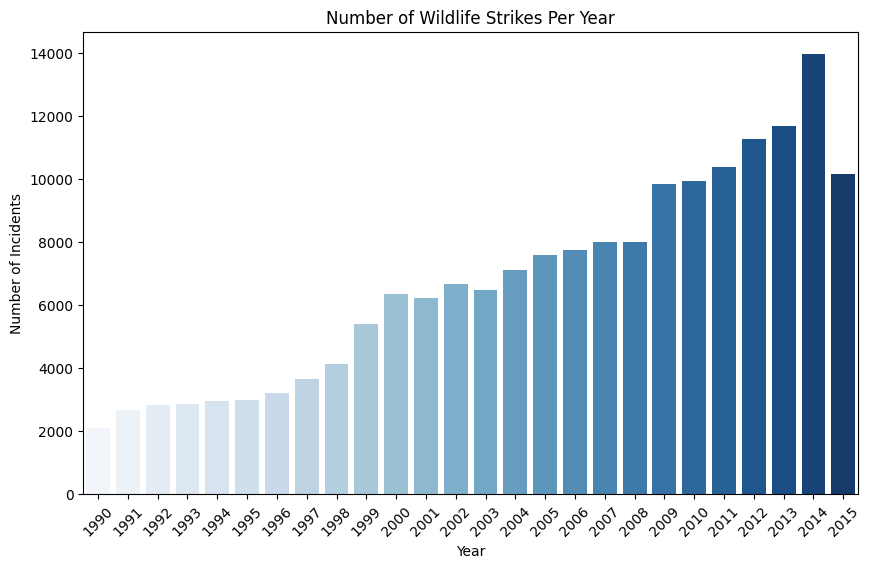

In [12]:
# Count incidents by year
yearly_trend = df_cleaned["Incident Year"].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_trend.index, y=yearly_trend.values, palette="Blues")
plt.title("Number of Wildlife Strikes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.show()

**Insights:**

The graph shows how incidents vary by year and month with 2014 being highest.

## 5.2. Geographical Distribution

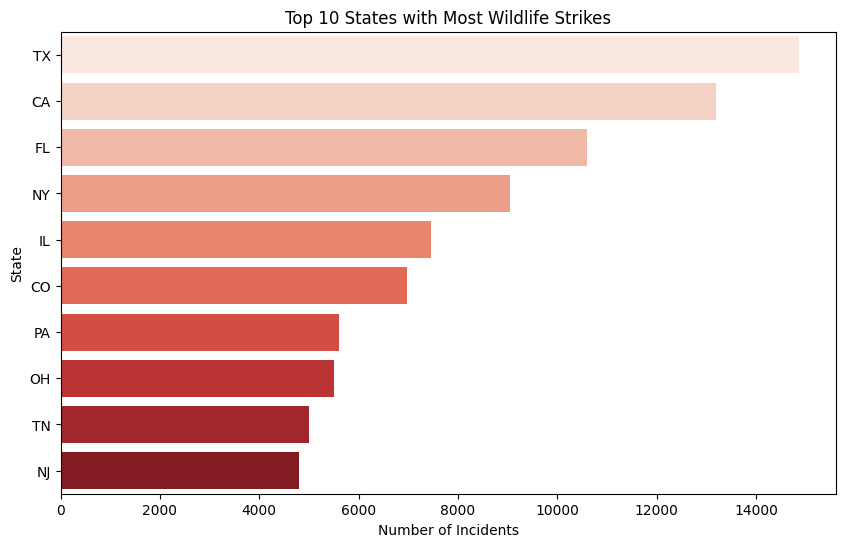

In [14]:
# Count incidents by state
state_trend = df_cleaned["State"].value_counts().head(10)

# Plot the trend
plt.figure(figsize=(10, 6))
sns.barplot(x=state_trend.values, y=state_trend.index, palette="Reds")
plt.title("Top 10 States with Most Wildlife Strikes")
plt.xlabel("Number of Incidents")
plt.ylabel("State")
plt.show()

**Insights:**

The bar chart helps identify airports or states with high incident frequencies.
- Texas having the highest frequency of incidents

## 5.3. Species Involvement

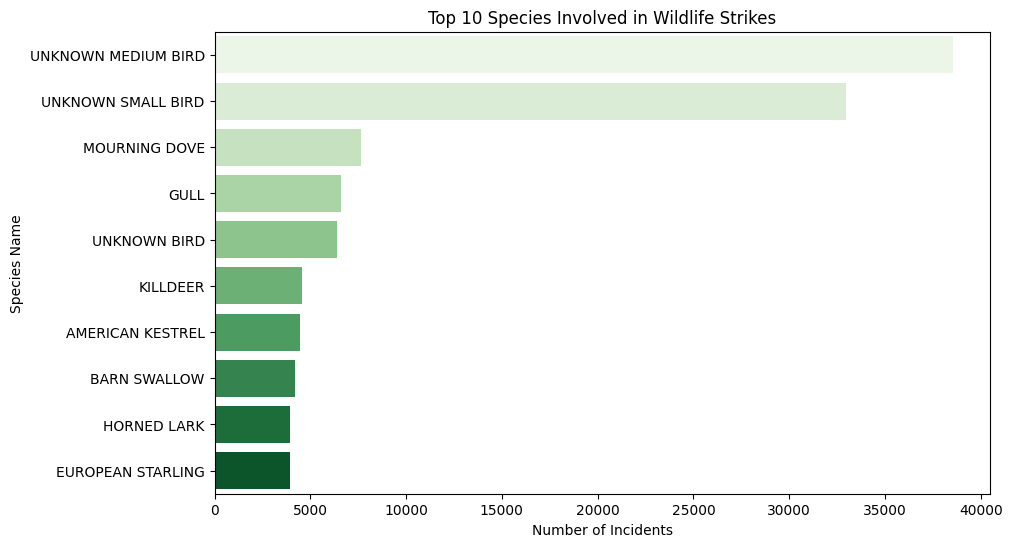

In [15]:
species_count = df_cleaned["Species Name"].value_counts().head(10)

# Plot the species data
plt.figure(figsize=(10, 6))
sns.barplot(x=species_count.values, y=species_count.index, palette="Greens")
plt.title("Top 10 Species Involved in Wildlife Strikes")
plt.xlabel("Number of Incidents")
plt.ylabel("Species Name")
plt.show()

**Insights:**

The bar chart helps determine which species are most commonly involved in strikes.
- Uknown Medium bird strikes the most with uknown small bird coming at second.

## 5.4. Damage Severity Analysis

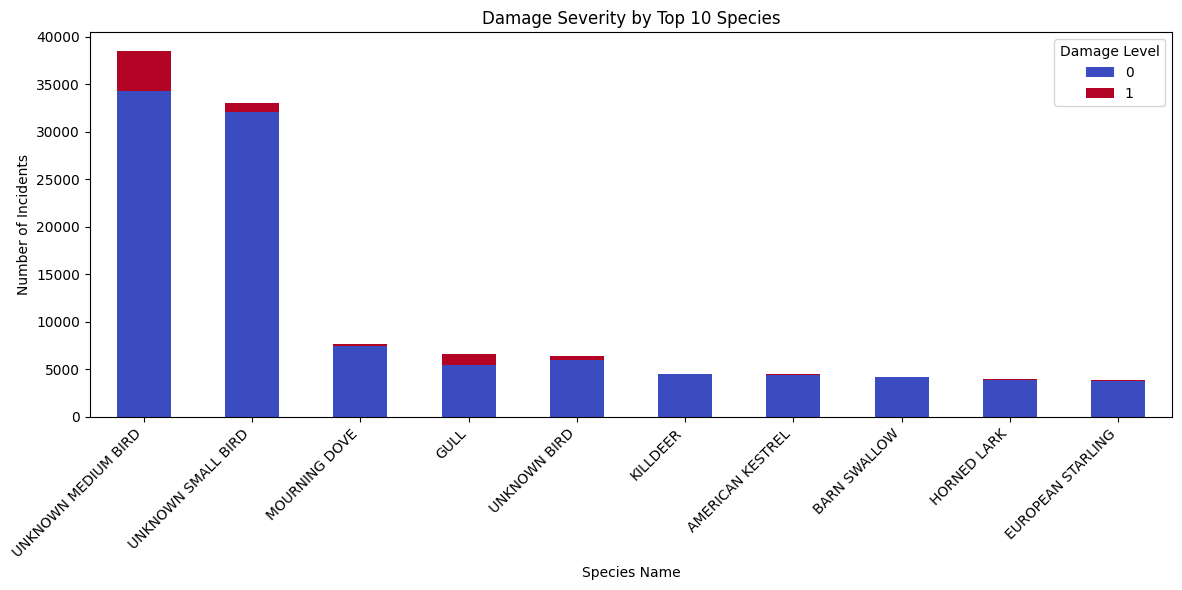

In [18]:
# Group by species and damage level, then sum and sort
species_damage = df_cleaned.groupby(["Species Name", "Aircraft Damage"]).size().unstack(fill_value=0)
top_species = species_damage.sum(axis=1).sort_values(ascending=False).head(10)  # Top 10 species

# Filter data for top species
filtered_damage = species_damage.loc[top_species.index]

# Plot stacked bar chart
filtered_damage.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Damage Severity by Top 10 Species")
plt.xlabel("Species Name")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Damage Level")
plt.tight_layout()
plt.show()



**Insight:**

Focused on top Species instead of displaying all species, limited the chart to the top 10 species based on the number of incidents. This reduced clutter and highlighted key contributors.

**a) High Number of Incidents with Unknown Bird Types:**

Unknown Medium Bird and Small Medium Bird account for a disproportionately large number of incidents.

This could indicate:
Difficulty in identifying species during incidents.
A need for better tracking, reporting, or classification of bird types during strike investigations.

**b) Medium Birds Are More Damaging:**

- Medium birds cause a higher number of level 1 (serious) damage incidents (~4,000). This makes sense because medium-sized birds likely have more mass, which can cause significant damage to aircraft.

These species may need more targeted mitigation efforts, such as habitat management around airports.

**c) Small Birds Are Less Damaging:**

- Despite their high frequency (~1,000 incidents with level 1 damage), small birds generally cause less severe damage. This aligns with their smaller mass and lower impact force.

However, the high volume of incidents still poses a cumulative risk to operational safety.

**d) The Last Five Species (Low Damage):**

- The last five species, with ~5,000 incidents and zero level 1 damage, represent birds that are either:

- Too small to cause significant structural damage.

- Flying patterns that are less likely to interfere critically with aircraft operations.

These species might be less of a priority for mitigation compared to medium and small-medium bird types.

# <font color=black> 6. Model training</font> <a class="anchor" id="chapter7"></a>

## 6.1. Preprocessing:

The preprocessing phase is crucial to prepare the data for modeling.

6.1.1. Handle Missing Values:

This ensures no gaps hinder the models, because our data is clean we will check for missing values first.

In [20]:
# Check missing values
missing_summary = df_cleaned.isnull().sum()
print(missing_summary)

Record ID         0
Incident Year     0
Incident Month    0
Incident Day      0
Operator ID       0
                 ..
Tail Damage       0
Lights Strike     0
Lights Damage     0
Other Strike      0
Other Damage      0
Length: 66, dtype: int64


There are no missing values.

6.1.2. Scale Numerical Features:

The objective is to normalize or standardize numerical values to improve model performance.

In [26]:
# Exclude irrelevant numerical columns
numerical_cols = [col for col in numerical_cols if col not in ['Record ID']]
print("Filtered Numerical Columns:", numerical_cols)

Filtered Numerical Columns: ['Incident Year', 'Incident Month', 'Incident Day', 'Aircraft Mass', 'Engine Make', 'Engines', 'Engine2 Position', 'Engine4 Position', 'Height', 'Speed', 'Distance', 'Fatalities', 'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage', 'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage', 'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage', 'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage', 'Engine Ingested', 'Propeller Strike', 'Propeller Damage', 'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike', 'Fuselage Damage', 'Landing Gear Strike', 'Landing Gear Damage', 'Tail Strike', 'Tail Damage', 'Lights Strike', 'Lights Damage', 'Other Strike', 'Other Damage']


In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

6.1.3. Handle Imbalanced Data:

Here imbalances in the target variable are addressed.

In [31]:
# Define the target variable (replace 'Damage Level' with the actual column name)
target_column = 'Record ID'
X = df_cleaned.drop(columns=[target_column])  # Features
y = df_cleaned[target_column]

In [32]:
# Perform one-hot encoding for categorical features (if any)
X = pd.get_dummies(X, drop_first=True)